In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "ticks", context = "talk", palette = "bright")

# Load Stored csv File

In [6]:
path_df = "/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/MAY24_BDS_INT_Fire_Brigade/data/"
df = pd.read_csv(path_df+'df_final.csv', index_col = "IncidentNumber", dtype={"IncidentNumber": "str"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537704 entries, 235138081 to 067903-30042024
Columns: 332 entries, TotalResponseTime to CellEastingNorthing2500_560000-187500
dtypes: float64(2), int64(324), object(6)
memory usage: 3.8+ GB


# Total Response Time Analysis

In [7]:
print(df["TotalResponseTime"].describe())

count    1.537704e+06
mean     3.213717e+02
std      1.356651e+02
min      6.000000e+01
25%      2.330000e+02
50%      2.970000e+02
75%      3.790000e+02
max      1.200000e+03
Name: TotalResponseTime, dtype: float64


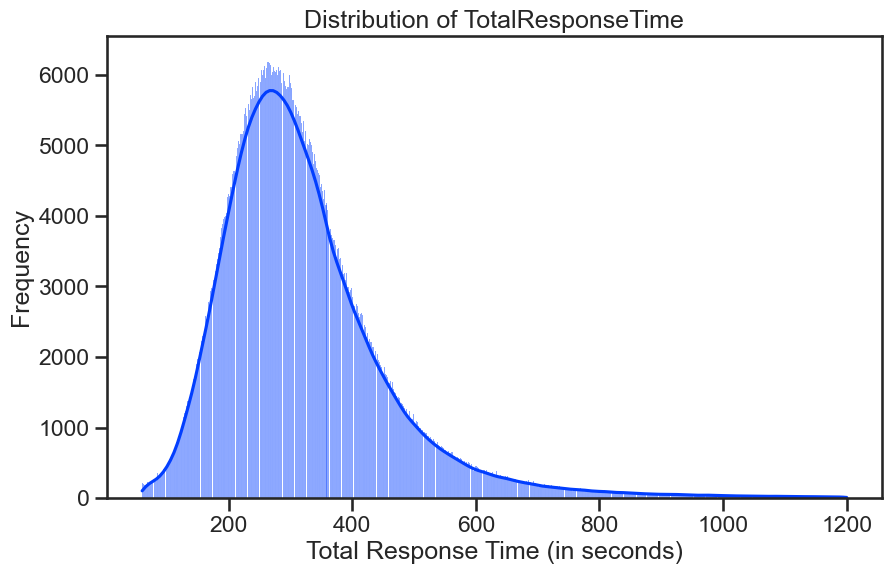

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df["TotalResponseTime"], bins=1200, kde=True)
plt.title(f'Distribution of {"TotalResponseTime"}')
plt.xlabel("Total Response Time (in seconds)")
plt.ylabel('Frequency')
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/hist_rt.png', bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

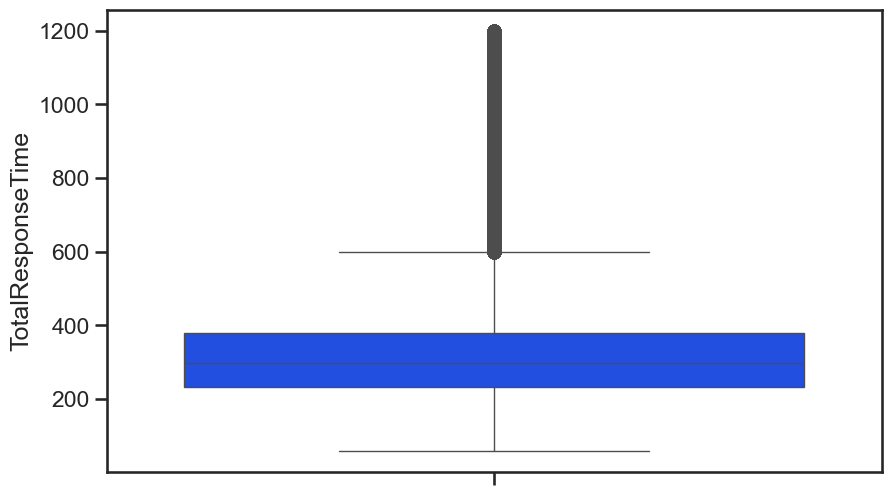

In [11]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y = "TotalResponseTime")
plt.show


In [12]:
from scipy.stats import shapiro
import statsmodels.api as sm

stat, p = shapiro(df["TotalResponseTime"])
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)

# Interpretation
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test Statistic: 0.8908341053165711
p-value: 6.492908237047428e-162
Sample does not look Gaussian (reject H0)


/Users/bennyschellinger/miniforge3/envs/lfb_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1537704.
  res = hypotest_fun_out(*samples, **kwds)


Total Response Time (in seconds) squared to approximate normal distribution

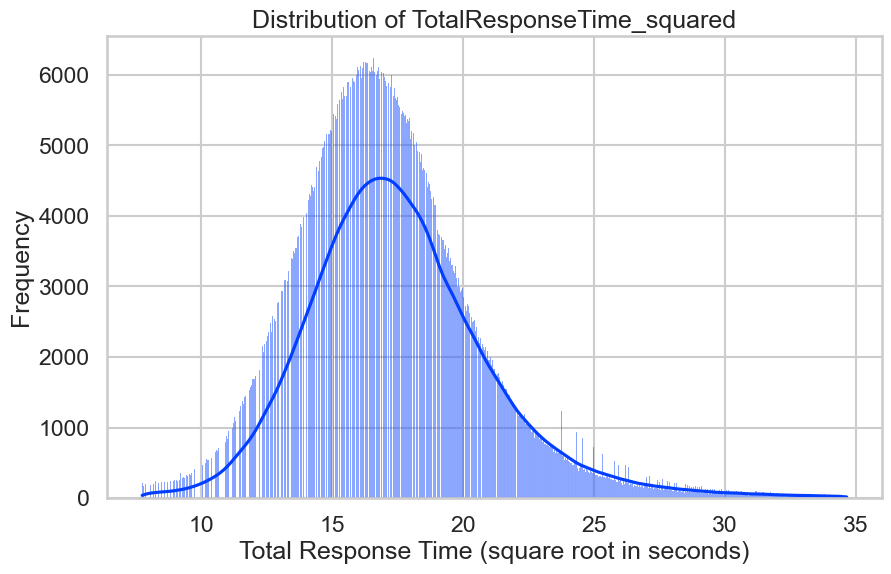

In [16]:
trt_sq = df.copy()
trt_sq["TotalResponseTime_squared"] = trt_sq["TotalResponseTime"].apply(lambda x: x ** (1/2))
trt_sq["TotalResponseTime_squared"]

plt.figure(figsize=(10, 6))
sns.histplot(trt_sq["TotalResponseTime_squared"], bins=1200, kde=True) # >= 60 seconds
plt.title(f'Distribution of {"TotalResponseTime_squared"}')
plt.xlabel("Total Response Time (square root in seconds)")
plt.ylabel('Frequency')
plt.show()

Standardized Total Response Time (in seconds)

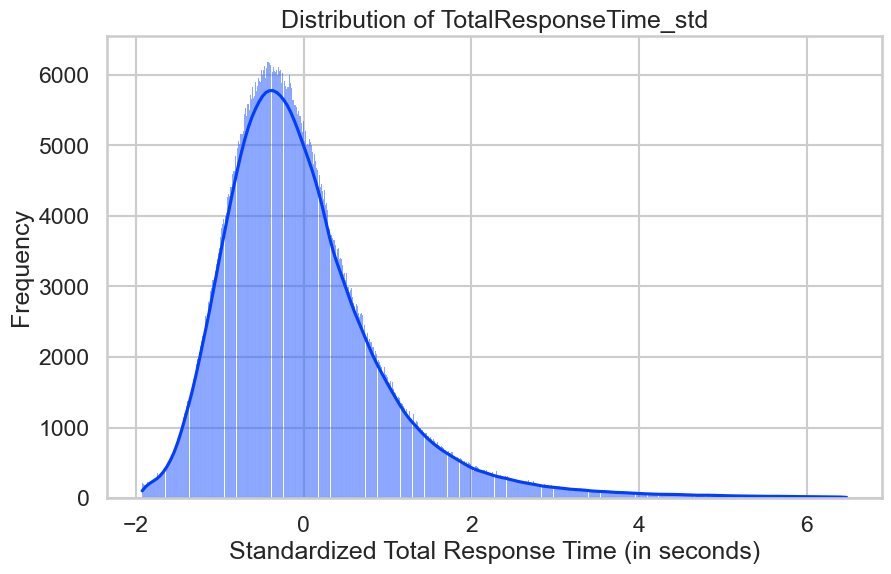

In [17]:
mean = df["TotalResponseTime"].mean()
std_dev = df["TotalResponseTime"].std()

trt_std = df.copy()

trt_std["TotalResponseTime_std"] = trt_std["TotalResponseTime"].apply(lambda x: ((x - mean) / std_dev))
trt_std["TotalResponseTime_std"]

plt.figure(figsize=(10, 6))
sns.histplot(trt_std["TotalResponseTime_std"], bins=1200, kde=True) # >= 60 seconds
plt.title(f'Distribution of {"TotalResponseTime_std"}')
plt.xlabel("Standardized Total Response Time (in seconds)")
plt.ylabel('Frequency')
plt.show()

# Statistical Test? (TBD)

# Distribution Response Time & Various Categories

- **1.c iii:** Response Time & Incident Type Distribution: Statistical distribution (histogram or box plot) of response time by incident type (e.g., Special Service, etc.).
- **1.c iv**: Response Time vs. Property Category: Statistical distribution (box plot) of esponse time by the property category (e.g., Road Vehicle, etc.).
- **1.e**: response time by Number of Calls: Average response time grouped by binned number of calls (e.g., 1, 2, 3, 4, 5-10, 11 - 20, etc.).

### 1. Total Response Time & Incident Type (Boxplots)


In [18]:
df[["TotalResponseTime", "IncidentGroup"]].head(3)

,TotalResponseTime,IncidentGroup
IncidentNumber,,
235138081,319.0,Special Service
2091,308.0,Fire
3091,210.0,Fire


#### Plot Total Response Time by Incident Type

In [49]:
for col in df:
    print("\n",df[col].value_counts())


 DateTimeCall
2012-06-19 07:03:04    2
2022-06-26 11:14:26    2
2012-08-11 19:11:06    2
2022-02-10 14:35:45    2
2023-08-04 14:54:31    2
                      ..
2013-12-07 20:16:02    1
2013-12-07 20:09:48    1
2013-12-07 20:08:34    1
2013-12-07 20:06:23    1
2024-04-29 23:59:36    1
Name: count, Length: 1536306, dtype: int64

 DeployedFromStation_Name
Soho             51962
Paddington       33144
Euston           30219
Lambeth          27112
Hammersmith      25613
                 ...  
Silvertown        1583
Dartford             2
Staines              1
Hertfordshire        1
Fordbridge           1
Name: count, Length: 116, dtype: int64

 DeployedFromLocation
Home Station     1487053
Other Station      50104
Name: count, dtype: int64

 PlusCode_Description
Initial Mobilisation            1534647
Running call                       2518
Addition to first attendance        539
Name: count, dtype: int64

 IncidentGroup
False Alarm        804996
Special Service    430918
Fire        

In [32]:
inc_cat = df["StopCodeDescription"].value_counts(normalize=True).sort_values()
print(inc_cat.sort_values(ascending=False))

StopCodeDescription
AFA                               0.397833
Special Service                   0.280231
False alarm - Good intent         0.111851
Primary Fire                      0.101875
Secondary Fire                    0.093920
False alarm - Malicious           0.013822
Chimney Fire                      0.000349
Late Call                         0.000116
Use of Special Operations Room    0.000003
Name: proportion, dtype: float64


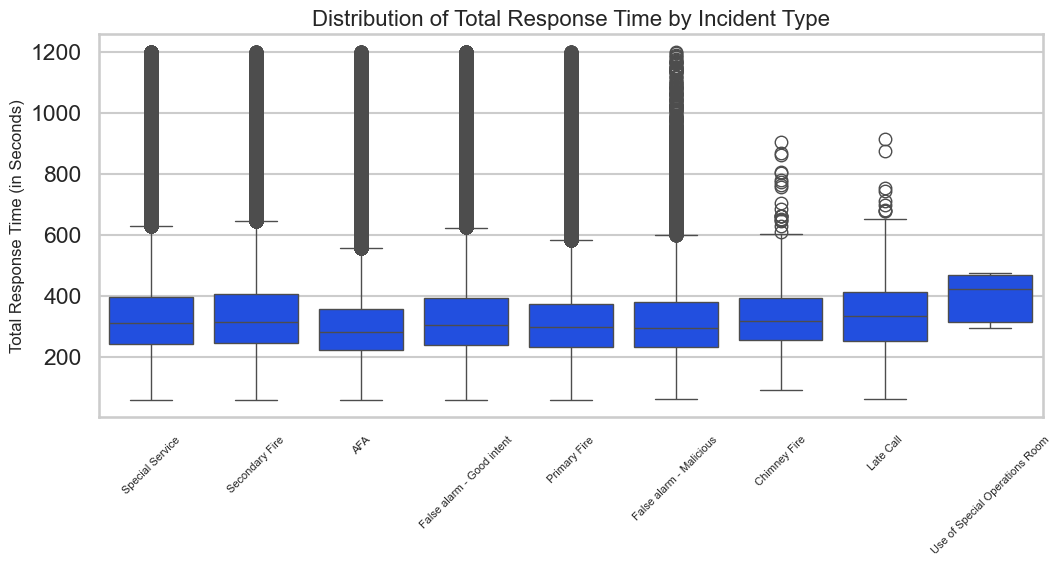

In [51]:
plt.figure(figsize=(11, 6))

sns.set_style("whitegrid")
box_plot = sns.boxplot(x = df["StopCodeDescription"], y = df["TotalResponseTime"])
plt.title('Distribution of Total Response Time by Incident Type', fontsize=16)
plt.xlabel("")
plt.ylabel('Total Response Time (in Seconds)', fontsize=12)
plt.xticks(fontsize=8, rotation = 45)

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/box_rt_inctype.png', bbox_inches='tight')
plt.show()


### 2.1 Total Response Time vs. Property Category (Boxplots)


In [20]:
prop_cat = df["PropertyCategory"].value_counts(normalize=True).sort_values()
print(prop_cat.sort_values(ascending=False))

PropertyCategory
Dwelling             0.480464
Non Residential      0.236443
Outdoor              0.086428
Road Vehicle         0.073875
Other Residential    0.062454
Outdoor Structure    0.058297
Rail Vehicle         0.000886
Aircraft             0.000723
Boat                 0.000430
Name: proportion, dtype: float64


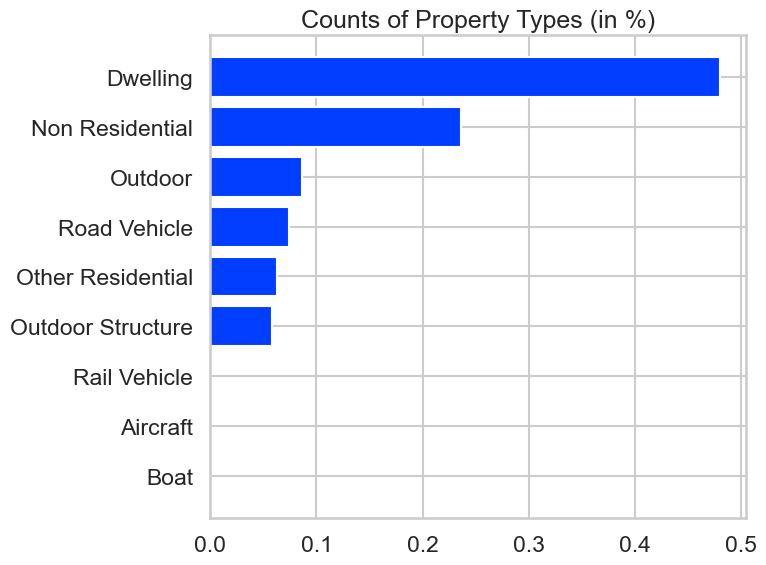

In [21]:
plt.figure(figsize=(8, 6))
plt.barh(prop_cat.index, prop_cat.values, height = 0.8)

plt.title('Counts of Property Types (in %)')

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/count_proptypes.png', bbox_inches='tight')
plt.show()

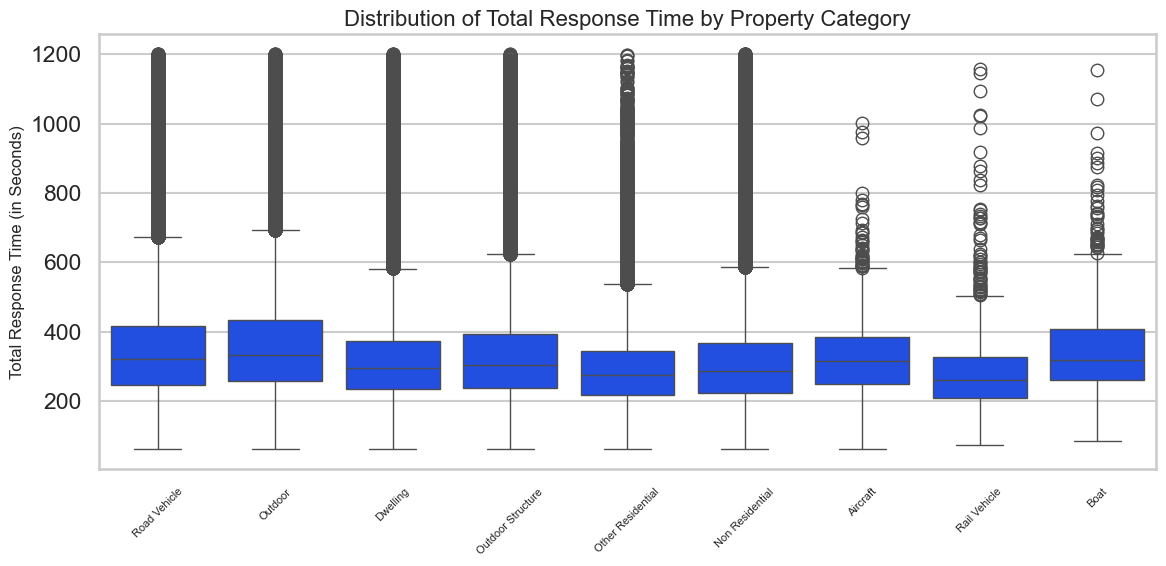

In [23]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
box_plot = sns.boxplot(x = df["PropertyCategory"], y = df["TotalResponseTime"])

plt.title('Distribution of Total Response Time by Property Category', fontsize=16)
plt.xlabel("")
plt.ylabel('Total Response Time (in Seconds)', fontsize=12)
plt.xticks(fontsize=8, rotation = 45)

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/box_rt_proptype.png', bbox_inches='tight')
plt.show()

In [25]:
df.IncidentGroup.value_counts()

IncidentGroup
False Alarm        804996
Special Service    430918
Fire               301790
Name: count, dtype: int64

### 2.2 Total Response Time vs. Property & Incident Category (Boxplots)

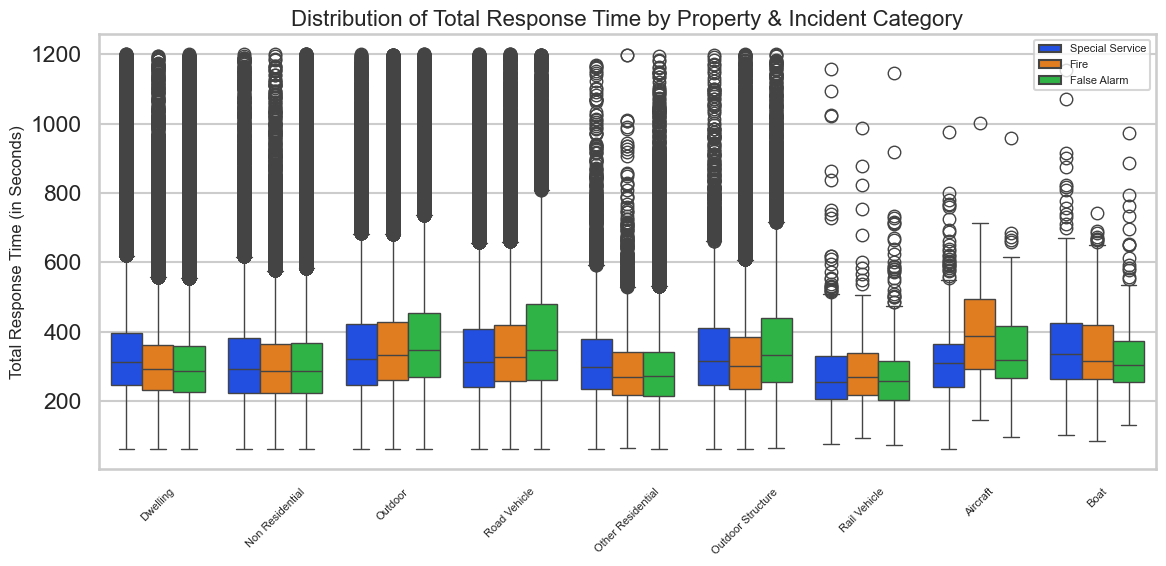

In [26]:
prop_order = prop_cat.sort_values(ascending=False)

plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
box_plot = sns.boxplot(x = df["PropertyCategory"], y = df["TotalResponseTime"], hue = df["IncidentGroup"], order = prop_order.index)

plt.title('Distribution of Total Response Time by Property & Incident Category', fontsize=16)
plt.xlabel("")
plt.ylabel('Total Response Time (in Seconds)', fontsize=12)
plt.xticks(fontsize=8, rotation = 45)
plt.legend(fontsize= 8)

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/box_rt_propinctype.png', bbox_inches='tight')
plt.show()

In [27]:
df["TotalResponseTime"].describe()

count    1.537704e+06
mean     3.213717e+02
std      1.356651e+02
min      6.000000e+01
25%      2.330000e+02
50%      2.970000e+02
75%      3.790000e+02
max      1.200000e+03
Name: TotalResponseTime, dtype: float64

### 3. Total Response time by Number of Calls (Boxplots)


In [62]:
df.NumCalls_bins_encoded.value_counts()

NumCalls_bins_encoded
0    1279610
1     187694
2      51058
3      12801
4       6541
Name: count, dtype: int64

#### Countplot of Number of Calls Bins

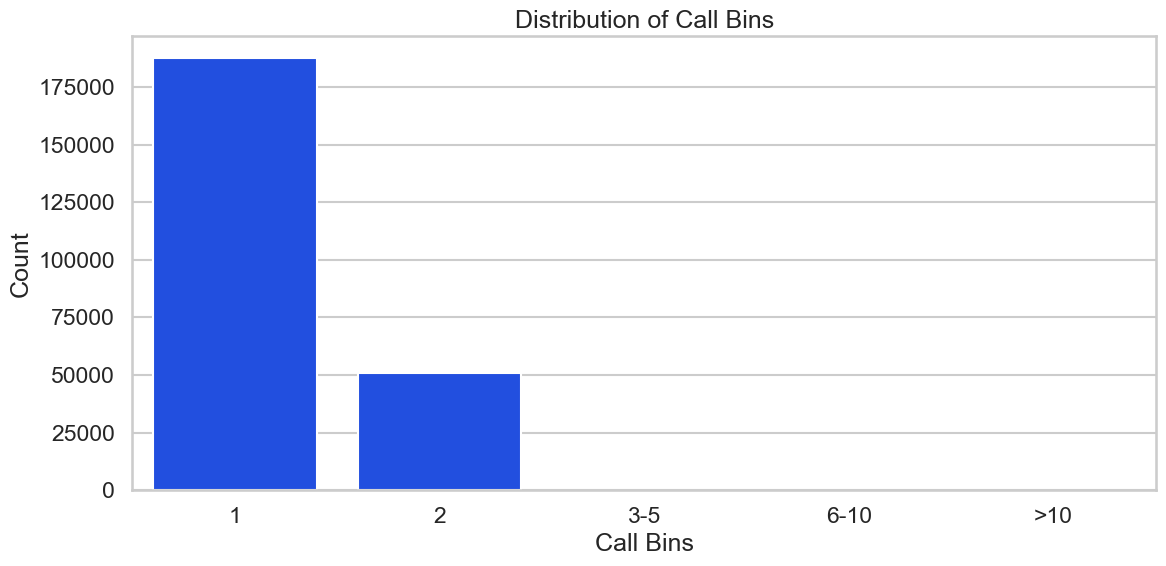

In [63]:
order = ['1', '2', '3-5', '6-10', '>10']

plt.figure(figsize=(12, 6))
sns.countplot(x='NumCalls_bins_encoded', data=df, order=order)

plt.title('Distribution of Call Bins')
plt.xlabel('Call Bins')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/count_callbins.png', bbox_inches='tight')
plt.show()

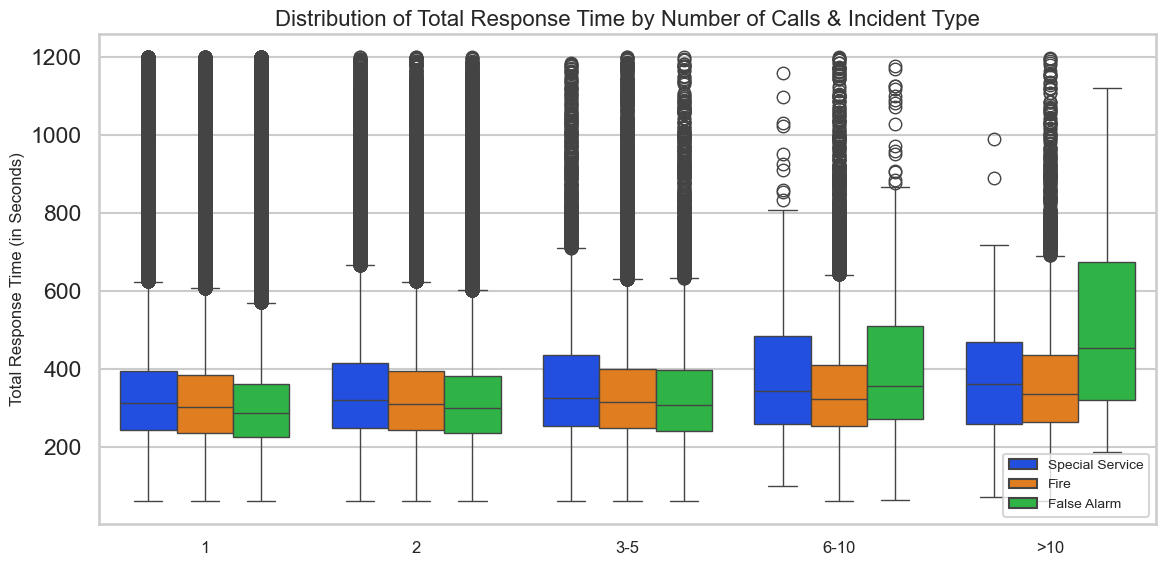

In [31]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='NumCalls_bins', y='TotalResponseTime', data=df, order = order, hue = "IncidentGroup")

plt.title('Distribution of Total Response Time by Number of Calls & Incident Type', fontsize=16)
plt.xlabel('')
plt.ylabel('Total Response Time (in Seconds)', fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/box_rt_callinctype.png',bbox_inches='tight')
plt.show()